In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [64]:
df = pd.read_csv('final_data.csv')

In [65]:
df.head()

,property_type,area_type,availability,location,bedroom,area,bath,balcony,price_per_sqft,price,built_up_area
0,flat,Super built-up Area,Ready To Move,somasundara palya,2,1140.0,2,2,4035.0,0.46,969.00
1,flat,Super built-up Area,Under Construction,marathahalli,3,1305.0,2,1,5287.0,0.69,1109.25
2,flat,Super built-up Area,Ready To Move,chikkalasandra,3,1270.0,2,3,4331.0,0.55,1079.50
3,flat,Super built-up Area,Ready To Move,harlur,2,1290.0,2,1,6589.0,0.85,1096.50
4,flat,Built-up Area,Ready To Move,other,3,1503.0,2,2,6188.0,0.93,1503.00


In [66]:
df.shape

(10626, 11)

In [67]:
latlong = pd.read_csv('latlong.csv')

In [68]:
latlong.head()

,Location,Latitude,Longitude
0,Somasundara Palya,12.9376° N,77.6986° E
1,Marathahalli,12.9644° N,77.7036° E
2,Chikkalasandra,12.8900° N,77.5470° E
3,Harlur,12.8125° N,77.6861° E
4,Hulimavu,12.8522° N,77.6292° E


In [69]:
latlong['Latitude'] = latlong['Latitude'].str.replace('°|N', '', regex=True).astype(float)
latlong['Longitude'] = latlong['Longitude'].str.replace('°|E', '', regex=True).astype(float)

In [70]:
latlong.rename(columns={'Location': 'location'}, inplace=True)

In [71]:
latlong['location'] = latlong['location'].str.lower()

In [72]:
latlong.head()

,location,Latitude,Longitude
0,somasundara palya,12.9376,77.6986
1,marathahalli,12.9644,77.7036
2,chikkalasandra,12.8900,77.5470
3,harlur,12.8125,77.6861
4,hulimavu,12.8522,77.6292


In [73]:
new_df = df.merge(latlong, on='location')

In [74]:
new_df.columns

Index(['property_type', 'area_type', 'availability', 'location', 'bedroom',
       'area', 'bath', 'balcony', 'price_per_sqft', 'price', 'built_up_area',
       'Latitude', 'Longitude'],
      dtype='object')

In [75]:
group_df = new_df.groupby('location')[['price','price_per_sqft','built_up_area','Latitude','Longitude']].mean()

In [76]:
group_df

,price,price_per_sqft,built_up_area,Latitude,Longitude
location,,,,,
devarachikkanahalli,0.552308,4326.461538,1107.596154,12.971600,77.594600
1st block jayanagar,2.957500,13882.250000,1808.937500,12.929273,77.582423
1st block koramangala,2.835000,13855.200000,1802.500000,12.927600,77.641100
1st phase jp nagar,1.578421,8659.157895,1594.373684,12.926100,77.590000
2nd stage nagarbhavi,2.701111,14381.333333,2172.222222,12.954200,77.558300
...,...,...,...,...,...
yelachenahalli,0.734667,5510.733333,1124.976667,12.973600,77.738600
yelahanka,0.747249,5088.280423,1278.661772,13.105600,77.593100
yelahanka new town,0.659474,5368.500000,1021.185526,13.105600,77.593100


In [77]:
fig = px.scatter_mapbox(
    group_df,
    lat="Latitude",
    lon="Longitude",
    color="price_per_sqft",
    size='built_up_area',
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=100,
    zoom=10,
    mapbox_style="open-street-map",
    text=group_df.index
)
fig.show()

In [78]:
df.sort_values(by='built_up_area', ascending=False).head(10)

,property_type,area_type,availability,location,bedroom,area,bath,balcony,price_per_sqft,price,built_up_area
1409,house,Plot Area,Under Construction,other,2,1306800.0,2,2,2.0,0.30,1306800.0
10551,house,Plot Area,Ready To Move,thyagaraja nagar,8,653400.0,6,2,44.0,2.90,653400.0
9467,house,Plot Area,Ready To Move,bommenahalli,3,653400.0,3,1,33.0,2.17,653400.0
7495,house,Plot Area,Ready To Move,other,3,261360.0,2,0,31.0,0.80,261360.0
9345,house,Plot Area,Under Construction,other,1,231303.6,1,0,48.0,1.10,231303.6
560,house,Plot Area,Ready To Move,other,2,91040.4,2,0,220.0,2.00,91040.4
6550,house,Plot Area,Ready To Move,other,2,54450.0,2,2,367.0,2.00,54450.0
6564,house,Plot Area,Ready To Move,other,3,52272.0,2,1,268.0,1.40,52272.0
6372,house,Plot Area,Ready To Move,other,1,41382.0,1,0,411.0,1.70,41382.0
8021,flat,Super built-up Area,Ready To Move,other,9,42000.0,8,3,417.0,1.75,35700.0


In [79]:
new_df = df[df['built_up_area'] < 20000]

In [80]:
fig = px.scatter(new_df, x="built_up_area", y="price", color="bedroom", title="Area Vs Price")

# Show the plot
fig.show()

In [87]:
fig = px.pie(df, names='bedroom', title='Distribution of bedrooms')

# Show the plot
fig.show()

In [88]:
temp_df = df[df['bedroom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedroom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

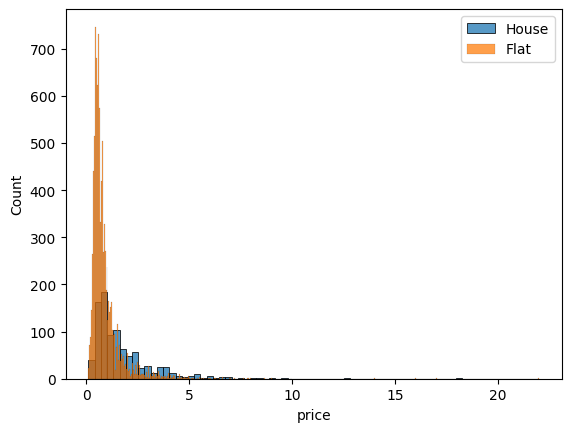

In [92]:
sns.histplot(df[df['property_type'] == 'house']['price'], label='House')
sns.histplot(df[df['property_type'] == 'flat']['price'], label='Flat')

plt.legend()
plt.show()